In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pickle as pkl
%matplotlib inline

In [2]:
def met_process(para, data, file):
    """
    para: names of meteorological parameters from IAG station as list
        str
    date: range of time series as hourly
        pandas DataFrame
    data: data file with information to import from Excel files
        pandas DataFrame
    file: path where Excel book with sheet files is saved
        path str
    """
    for k,v in para.items():
        if k == 'ws_kph':
            df = pd.read_excel(file,sheet_name=k).set_index('day').stack().reset_index()
            df.rename(columns={0:k},inplace=True)
            data[v] = (df[k]/3.6).round(2)
        elif k == 'sunshine':
            df = pd.read_excel(file,sheet_name=k).fillna(0).set_index('day').stack().reset_index()
            df.rename(columns={0:k},inplace=True)
            data[v] = df[k]
        elif k == 'wd_card':
            df = pd.read_excel(file, sheet_name=k).set_index('day').stack().reset_index()
            df.rename(columns={0:k}, inplace=True)
            directions = {'N':0, 'NNE':22.5,'NE':45,'ENE':67.5,'E':90,
                          'ESE':112.5,'SE':135,'SSE':157.5,'S':180,
                          'SSW':202.5,'SW':225,'WSW':247.5,'W':270,
                          'WNW':292.5,'NW':315,'NNW':337.5}
            data[v]=df[k].replace(directions)
            data.loc[data[v]=='C',v] = np.nan
            data[v].fillna(method='ffill', inplace=True)
        elif k == 'cloud':
            df = pd.read_excel(file,sheet_name=k)
            df['local_date'] = pd.to_datetime(df.iloc[:,:4]).dt.tz_localize('America/Sao_Paulo')
            df.rename(columns={'cloud_cover [tenths]':v}, inplace=True)
            data = data.merge(df[['local_date',v]],how='left')
        
        else:
            df = pd.read_excel(file, sheet_name=k).set_index('day').stack().reset_index()
            df.rename(columns={0:k},inplace=True)
            data[v] = df[k]
    data.set_index('local_date', inplace=True)
    return data


In [3]:
para = {'ws_kph':'ws','wd_card':'wd','temp_c':'tc','rh':'rh',
        'pres_mb':'pres','rain_mm':'rr','sunshine':'sun','cloud':'cc'}
date = pd.date_range('2018-09-01 00:00','2018-09-30 23:00', tz='America/Sao_Paulo',freq='H')
data = pd.DataFrame({'local_date':date,'name':'IAG','code':0})
file = 'set2018/iag_sep18.xlsx'

sep2018 = met_process(para=para, data=data, file=file)
sep2018

,name,code,ws,wd,tc,rh,pres,rr,sun,cc
local_date,,,,,,,,,,
2018-09-01 00:00:00-03:00,IAG,0,0.56,315.0,17.1,68,924.920435,0.0,0.0,NaN
2018-09-01 01:00:00-03:00,IAG,0,0.56,315.0,16.5,70,924.951833,0.0,0.0,NaN
2018-09-01 02:00:00-03:00,IAG,0,0.28,315.0,16.0,83,924.849909,0.0,0.0,NaN
2018-09-01 03:00:00-03:00,IAG,0,0.00,315.0,15.9,87,924.481341,0.0,0.0,NaN
2018-09-01 04:00:00-03:00,IAG,0,0.28,315.0,15.9,88,924.512739,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00-03:00,IAG,0,1.39,45.0,19.8,96,925.178335,0.1,0.0,10.0
2018-09-30 20:00:00-03:00,IAG,0,1.11,22.5,19.5,94,925.254156,0.0,0.0,10.0
2018-09-30 21:00:00-03:00,IAG,0,1.67,45.0,19.2,96,925.121312,0.0,0.0,10.0


In [4]:
para = {'ws_kph':'ws','wd_card':'wd','temp_c':'tc','rh':'rh',
        'pres_mb':'pres','rain_mm':'rr','sunshine':'sun','cloud':'cc'}
date = pd.date_range('2018-10-01 00:00','2018-10-31 23:00', tz='America/Sao_Paulo',freq='H')
data = pd.DataFrame({'local_date':date,'name':'IAG','code':0})
file = 'oct2018/iag_oct18.xlsx'

oct2018 = met_process(para=para, data=data, file=file)
oct2018

,name,code,ws,wd,tc,rh,pres,rr,sun,cc
local_date,,,,,,,,,,
2018-10-01 00:00:00-03:00,IAG,0,0.28,22.5,18.6,96,923.713360,0.0,0.0,NaN
2018-10-01 01:00:00-03:00,IAG,0,0.00,22.5,18.3,96,922.714176,0.0,0.0,NaN
2018-10-01 02:00:00-03:00,IAG,0,0.00,22.5,18.3,96,922.514926,0.0,0.0,NaN
2018-10-01 03:00:00-03:00,IAG,0,0.28,22.5,18.3,96,922.182353,0.0,0.0,NaN
2018-10-01 04:00:00-03:00,IAG,0,0.00,22.5,18.5,96,922.649715,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-10-31 19:00:00-03:00,IAG,0,1.39,90.0,18.4,95,924.874335,0.1,0.0,10.0
2018-10-31 20:00:00-03:00,IAG,0,0.28,135.0,18.2,96,926.085304,0.0,0.0,10.0
2018-10-31 21:00:00-03:00,IAG,0,0.83,45.0,18.4,95,925.967609,0.0,0.0,10.0


In [5]:
ls

CETESB Stations.R  WR_Plot.R          iag_met.pkl        set2020/
IAG.Rproj          all_met_0.csv      oct2018/
Met.ipynb          fig/               set2018/


In [7]:
sep2018

,name,code,ws,wd,tc,rh,pres,rr,sun,cc
local_date,,,,,,,,,,
2018-09-01 00:00:00-03:00,IAG,0,0.56,315.0,17.1,68,924.920435,0.0,0.0,NaN
2018-09-01 01:00:00-03:00,IAG,0,0.56,315.0,16.5,70,924.951833,0.0,0.0,NaN
2018-09-01 02:00:00-03:00,IAG,0,0.28,315.0,16.0,83,924.849909,0.0,0.0,NaN
2018-09-01 03:00:00-03:00,IAG,0,0.00,315.0,15.9,87,924.481341,0.0,0.0,NaN
2018-09-01 04:00:00-03:00,IAG,0,0.28,315.0,15.9,88,924.512739,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00-03:00,IAG,0,1.39,45.0,19.8,96,925.178335,0.1,0.0,10.0
2018-09-30 20:00:00-03:00,IAG,0,1.11,22.5,19.5,94,925.254156,0.0,0.0,10.0
2018-09-30 21:00:00-03:00,IAG,0,1.67,45.0,19.2,96,925.121312,0.0,0.0,10.0


In [8]:
oct2018

,name,code,ws,wd,tc,rh,pres,rr,sun,cc
local_date,,,,,,,,,,
2018-10-01 00:00:00-03:00,IAG,0,0.28,22.5,18.6,96,923.713360,0.0,0.0,NaN
2018-10-01 01:00:00-03:00,IAG,0,0.00,22.5,18.3,96,922.714176,0.0,0.0,NaN
2018-10-01 02:00:00-03:00,IAG,0,0.00,22.5,18.3,96,922.514926,0.0,0.0,NaN
2018-10-01 03:00:00-03:00,IAG,0,0.28,22.5,18.3,96,922.182353,0.0,0.0,NaN
2018-10-01 04:00:00-03:00,IAG,0,0.00,22.5,18.5,96,922.649715,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-10-31 19:00:00-03:00,IAG,0,1.39,90.0,18.4,95,924.874335,0.1,0.0,10.0
2018-10-31 20:00:00-03:00,IAG,0,0.28,135.0,18.2,96,926.085304,0.0,0.0,10.0
2018-10-31 21:00:00-03:00,IAG,0,0.83,45.0,18.4,95,925.967609,0.0,0.0,10.0


In [6]:
data = pd.concat([sep2018,oct2018])

In [88]:
data.to_pickle('iag_met.pkl')
data.to_csv('all_met_0.csv')

In [94]:
data.loc['2018-10-27':'2018-10-28'][['ws']]

,ws
local_date,
2018-10-27 00:00:00-03:00,1.11
2018-10-27 01:00:00-03:00,1.39
2018-10-27 02:00:00-03:00,2.78
2018-10-27 03:00:00-03:00,2.22
2018-10-27 04:00:00-03:00,3.06
2018-10-27 05:00:00-03:00,3.33
2018-10-27 06:00:00-03:00,3.89
2018-10-27 07:00:00-03:00,3.06
2018-10-27 08:00:00-03:00,4.17


/Users/adelgado/opt/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


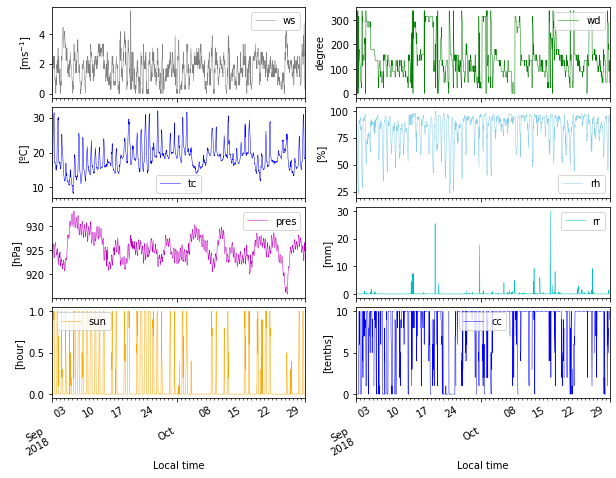

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
y_labels = ['[ms$^{-1}$]','degree','[ºC]','[%]','[hPa]','[mm]','[hour]','[tenths]']
axes = data.iloc[:,2:].plot(subplots=True,sharex=True, ax = ax, layout=(4,2), xlabel='Local time',
                     color=['0.5','g','b','skyblue','m','c','orange','b'], style='-', lw=0.5,markersize=2)
i = [0,0,1,1,2,2,3,3]
j = [0,1,0,1,0,1,0,1]
for i,j,l in zip(i,j,y_labels):
    axes[i,j].set_ylabel(l)
fig.savefig('../../4_Draft_Report/Dissertation/fig/IAG_met.pdf', bbox_inches='tight', facecolor='w')

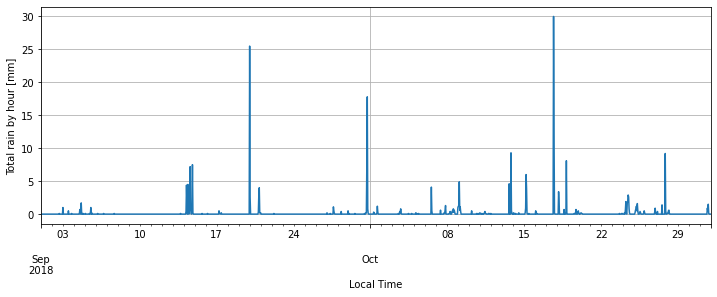

In [61]:
fig, ax = plt.subplots(figsize=(12,4))
data.rr.plot(ax=ax, rot=0, grid=True)
ax.set_ylabel('Total rain by hour [mm]')
ax.set_xlabel('Local Time')
ax = plt.gca()
plt.gca().margins(x=0)
#ax.xaxis.set_major_formatter(md.DateFormatter('%b-%d'))
#ax.xaxis.set_major_locator(md.DayLocator(np.arange(0,31)))
fig.savefig('fig/rain_timeseries.pdf');

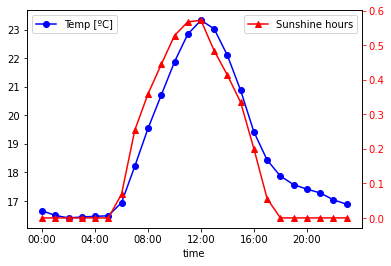

In [62]:
ht = 4*60*60*np.arange(6)
fig, ax = plt.subplots(figsize=(6,4))

data.groupby(data.index.time).mean().tc.plot(xticks=ht,ax=ax,c='b',marker='o',label='Temp [ºC]')
ax2 = ax.twinx()
data.groupby(data.index.time).mean().sun.plot(xticks=ht,ax=ax2,color='r',marker='^',label='Sunshine hours')
ax.legend(loc=2)
ax2.legend(loc=0)
ax2.tick_params(axis='y', colors='r');